In [1]:
import requests
import json
import time
import os
import pandas as pd
import requests
from pandas.io.json import json_normalize
import csv

from global_functions import *

In [2]:
df = pd.read_csv('data/bugs_full.csv',index_col=False,
                dtype={'version':str,'release':str})
df = df[['creation_time','id','last_change_time','priority', 'product', 'resolution',
         'severity', 'status','version']].rename(index=str,columns={'product':'Product'})
df

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,creation_time,id,last_change_time,priority,Product,resolution,severity,status,version
0,2015-08-19T10:50:25Z,475361,2015-08-19T11:53:03Z,P3,Platform,FIXED,normal,RESOLVED,4.5
1,2015-08-19T11:34:37Z,475365,2015-08-26T14:29:30Z,P3,Platform,FIXED,minor,RESOLVED,4.6
2,2015-08-19T12:09:06Z,475370,2018-05-15T19:56:24Z,P3,Platform,DUPLICATE,minor,CLOSED,4.5
3,2015-08-19T13:39:12Z,475379,2015-08-19T13:39:12Z,P3,Platform,NaN,normal,NEW,4.5
4,2015-08-19T17:06:10Z,475407,2015-08-19T17:17:37Z,P3,Platform,FIXED,normal,RESOLVED,4.5
5,2015-08-19T21:37:59Z,475427,2015-09-29T17:37:42Z,P3,Platform,FIXED,normal,RESOLVED,4.5
6,2015-08-20T11:38:51Z,475471,2015-08-20T11:38:51Z,P3,Platform,NaN,normal,NEW,4.6
7,2015-08-20T12:40:05Z,475478,2015-11-18T15:23:09Z,P3,Platform,FIXED,normal,VERIFIED,4.6
8,2015-08-20T12:52:36Z,475479,2015-08-20T12:52:36Z,P3,Platform,NaN,normal,NEW,4.6
9,2015-08-20T12:57:43Z,475480,2016-01-28T17:31:43Z,P3,Platform,FIXED,minor,VERIFIED,4.5


In [3]:
#Load data
df['release'] = df.apply(lambda x : str(assign_to_closest_minor(x['version'])), axis=1)

In [4]:
#Important note that can affect our experiments:
#There is a 3.8 release of Eclipse Juno; 
#it is not promoted on the main downloads page, but a packaged distribution is available for download.[32] 
#Eclipse 3.8 provides bugfixes for Indigo & adds Java 7 support, and 
#its maintenance was dual streamed with 4.2.[33] # <<<<<-------------------
#Features and plug-ins equivalent to a packaged distribution may be added from within the IDE.

relase_creation_ts_all = get_release_dates()

yearly_releases = get_yearly_releases()

relase_creation_ts_rolling = get_rolling_releases()



In [5]:
def get_period(creation_time,release_number):
    release_time = relase_creation_ts_all[release_number]
    release_time = pd.to_datetime(release_time)
    if creation_time<release_time:
        return 'before'
    return 'after'

df['creation_time'] = pd.to_datetime(df['creation_time'])
df['period'] = df.apply(lambda x: get_period(x['creation_time'],x['release']),axis=1)

In [6]:
len(df)

138445

In [7]:
bugs_reported = (
    df
    .groupby(by=['release','period'])['id']
    .nunique()
    .reset_index()
    .rename(index=str,columns={'id':'reported'})
)
bugs_reported

,release,period,reported
0,3.0,after,6970
1,3.0,before,17967
2,3.1,after,5718
3,3.1,before,12190
4,3.2,after,5354
5,3.2,before,10480
6,3.3,after,4550
7,3.3,before,8092
8,3.4,after,4579
9,3.4,before,7931


In [8]:
fixed_bugs = df.copy()
fixed_bugs = fixed_bugs[fixed_bugs['resolution']=='FIXED']
len(fixed_bugs)

65209

In [9]:
def get_time_dif(a,b):
    c = a - b
    return c.days

fixed_bugs['creation_time'] = pd.to_datetime(fixed_bugs['creation_time'])
fixed_bugs['last_change_time'] = pd.to_datetime(fixed_bugs['last_change_time'])
fixed_bugs['fix_time_bram'] = fixed_bugs.apply(lambda x: get_time_dif(x['last_change_time'],x['creation_time']), axis=1)

In [10]:
fixed_bugs.head()

,creation_time,id,last_change_time,priority,Product,resolution,severity,status,version,release,period,fix_time_bram
0,2015-08-19 10:50:25,475361,2015-08-19 11:53:03,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0
1,2015-08-19 11:34:37,475365,2015-08-26 14:29:30,P3,Platform,FIXED,minor,RESOLVED,4.6,4.6,before,7
4,2015-08-19 17:06:10,475407,2015-08-19 17:17:37,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0
5,2015-08-19 21:37:59,475427,2015-09-29 17:37:42,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,40
7,2015-08-20 12:40:05,475478,2015-11-18 15:23:09,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,90


In [11]:
our_processed_data = pd.read_csv('data'+os.sep+'bugs_info.csv',index_col=False)
our_processed_data = our_processed_data[['id','last_fixed_date']]
our_processed_data.head()

,id,last_fixed_date
0,475361,2015-08-19 11:53:03
1,475365,2015-08-26 14:29:30
2,475370,NaN
3,475379,NaN
4,475407,2015-08-19 17:15:25


In [12]:
fixed_bugs

,creation_time,id,last_change_time,priority,Product,resolution,severity,status,version,release,period,fix_time_bram
0,2015-08-19 10:50:25,475361,2015-08-19 11:53:03,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0
1,2015-08-19 11:34:37,475365,2015-08-26 14:29:30,P3,Platform,FIXED,minor,RESOLVED,4.6,4.6,before,7
4,2015-08-19 17:06:10,475407,2015-08-19 17:17:37,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0
5,2015-08-19 21:37:59,475427,2015-09-29 17:37:42,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,40
7,2015-08-20 12:40:05,475478,2015-11-18 15:23:09,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,90
9,2015-08-20 12:57:43,475480,2016-01-28 17:31:43,P3,Platform,FIXED,minor,VERIFIED,4.5,4.5,after,161
27,2015-08-22 09:03:29,475629,2015-08-23 02:34:40,P3,Platform,FIXED,minor,RESOLVED,4.5,4.5,after,0
37,2015-08-23 06:35:34,475654,2015-11-18 15:22:54,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,87
38,2015-08-23 08:19:43,475658,2017-12-15 15:35:48,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,845
39,2015-08-23 08:26:13,475659,2018-01-23 20:31:47,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,884


In [13]:
fixed_bugs = pd.merge(fixed_bugs,our_processed_data,on=['id'],how='left')
fixed_bugs['last_fixed_date'] = pd.to_datetime(fixed_bugs['last_fixed_date'])
fixed_bugs['creation_time'] = pd.to_datetime(fixed_bugs['creation_time'])
fixed_bugs.head()

,creation_time,id,last_change_time,priority,Product,resolution,severity,status,version,release,period,fix_time_bram,last_fixed_date
0,2015-08-19 10:50:25,475361,2015-08-19 11:53:03,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 11:53:03
1,2015-08-19 11:34:37,475365,2015-08-26 14:29:30,P3,Platform,FIXED,minor,RESOLVED,4.6,4.6,before,7,2015-08-26 14:29:30
2,2015-08-19 17:06:10,475407,2015-08-19 17:17:37,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 17:15:25
3,2015-08-19 21:37:59,475427,2015-09-29 17:37:42,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,40,2015-09-28 08:47:16
4,2015-08-20 12:40:05,475478,2015-11-18 15:23:09,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,90,2015-11-16 14:14:06


In [14]:
release_c_time = get_release_dates()
release_c_time

{'3.0': '2004-06-25 00:00:00',
 '3.1': '2005-06-28 00:00:00',
 '3.2': '2006-06-29 00:00:00',
 '3.3': '2007-06-28 00:00:00',
 '3.4': '2008-06-25 00:00:00',
 '3.5': '2009-06-24 00:00:00',
 '3.6': '2010-06-23 00:00:00',
 '3.7': '2011-06-22 00:00:00',
 '3.8': '2012-06-27 00:00:00',
 '4.2': '2012-06-27 00:00:00',
 '4.3': '2013-06-26 20:00:00',
 '4.4': '2014-06-25 12:15:00',
 '4.5': '2015-06-24 20:00:00',
 '4.6': '2016-06-22 11:00:00',
 '4.7': '2017-06-28 09:50:00',
 '4.8': '2018-06-27 00:00:00',
 '4.9': '2018-09-19 00:00:00',
 '4.10': '2018-12-19 00:00:00'}

In [15]:
def get_before_after(creation_date,release):
    release_date = release_c_time[release]
    release_date = pd.to_datetime(release_date)
    creation_date = pd.to_datetime(creation_date)
    if creation_date>=release_date:
        return 'after'
    else:
        return 'before'
fixed_bugs['type'] = fixed_bugs.apply(lambda x: get_before_after(x['creation_time'],x['release']), axis=1)

In [16]:
fixed_bugs

,creation_time,id,last_change_time,priority,Product,resolution,severity,status,version,release,period,fix_time_bram,last_fixed_date,type
0,2015-08-19 10:50:25,475361,2015-08-19 11:53:03,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 11:53:03,after
1,2015-08-19 11:34:37,475365,2015-08-26 14:29:30,P3,Platform,FIXED,minor,RESOLVED,4.6,4.6,before,7,2015-08-26 14:29:30,before
2,2015-08-19 17:06:10,475407,2015-08-19 17:17:37,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 17:15:25,after
3,2015-08-19 21:37:59,475427,2015-09-29 17:37:42,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,40,2015-09-28 08:47:16,after
4,2015-08-20 12:40:05,475478,2015-11-18 15:23:09,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,90,2015-11-16 14:14:06,before
5,2015-08-20 12:57:43,475480,2016-01-28 17:31:43,P3,Platform,FIXED,minor,VERIFIED,4.5,4.5,after,161,2015-11-25 16:16:51,after
6,2015-08-22 09:03:29,475629,2015-08-23 02:34:40,P3,Platform,FIXED,minor,RESOLVED,4.5,4.5,after,0,2015-08-23 02:34:40,after
7,2015-08-23 06:35:34,475654,2015-11-18 15:22:54,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,87,2015-11-16 13:47:01,before
8,2015-08-23 08:19:43,475658,2017-12-15 15:35:48,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,845,2017-12-15 15:27:19,before
9,2015-08-23 08:26:13,475659,2018-01-23 20:31:47,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,884,2017-12-15 15:54:49,before


In [17]:
fixed_bugs['fix_time_ours'] = fixed_bugs.apply(lambda x: get_time_dif(x['last_fixed_date'],x['creation_time']), axis=1)

In [18]:
fixed_bugs['diff'] = fixed_bugs['fix_time_ours']-fixed_bugs['fix_time_bram']

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
sns.violinplot('diff', data=fixed_bugs, ax = axes)

plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 640x480 with 1 Axes>

In [20]:
fixed_bugs.describe()

,id,fix_time_bram,fix_time_ours,diff
count,65209.000000,65209.000000,64361.000000,64361.000000
mean,231472.149013,161.828153,105.111605,-56.614534
std,150370.863378,440.393512,330.632070,281.854331
min,2802.000000,0.000000,0.000000,-5502.000000
25%,95117.000000,3.000000,0.000000,-19.000000
50%,202187.000000,23.000000,7.000000,-1.000000
75%,338673.000000,107.000000,54.000000,0.000000
max,544611.000000,5506.000000,5470.000000,15.000000


In [21]:
fixed_bugs.head()

,creation_time,id,last_change_time,priority,Product,resolution,severity,status,version,release,period,fix_time_bram,last_fixed_date,type,fix_time_ours,diff
0,2015-08-19 10:50:25,475361,2015-08-19 11:53:03,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 11:53:03,after,0.0,0.0
1,2015-08-19 11:34:37,475365,2015-08-26 14:29:30,P3,Platform,FIXED,minor,RESOLVED,4.6,4.6,before,7,2015-08-26 14:29:30,before,7.0,0.0
2,2015-08-19 17:06:10,475407,2015-08-19 17:17:37,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 17:15:25,after,0.0,0.0
3,2015-08-19 21:37:59,475427,2015-09-29 17:37:42,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,40,2015-09-28 08:47:16,after,39.0,-1.0
4,2015-08-20 12:40:05,475478,2015-11-18 15:23:09,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,90,2015-11-16 14:14:06,before,88.0,-2.0


## fixing rate RQ2

In [22]:

def get_period(creation_time,release_number):
    release_time = relase_creation_ts_all[release_number]
    release_time = pd.to_datetime(release_time)
    if creation_time<release_time:
        return 'before'
    return 'after'

fixed_bugs['period'] = fixed_bugs.apply(lambda x: get_period(x['creation_time'],x['release']),axis=1)

In [23]:
fixed_bugs.head()

,creation_time,id,last_change_time,priority,Product,resolution,severity,status,version,release,period,fix_time_bram,last_fixed_date,type,fix_time_ours,diff
0,2015-08-19 10:50:25,475361,2015-08-19 11:53:03,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 11:53:03,after,0.0,0.0
1,2015-08-19 11:34:37,475365,2015-08-26 14:29:30,P3,Platform,FIXED,minor,RESOLVED,4.6,4.6,before,7,2015-08-26 14:29:30,before,7.0,0.0
2,2015-08-19 17:06:10,475407,2015-08-19 17:17:37,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,0,2015-08-19 17:15:25,after,0.0,0.0
3,2015-08-19 21:37:59,475427,2015-09-29 17:37:42,P3,Platform,FIXED,normal,RESOLVED,4.5,4.5,after,40,2015-09-28 08:47:16,after,39.0,-1.0
4,2015-08-20 12:40:05,475478,2015-11-18 15:23:09,P3,Platform,FIXED,normal,VERIFIED,4.6,4.6,before,90,2015-11-16 14:14:06,before,88.0,-2.0


In [24]:
bugs_fixed_status = fixed_bugs.groupby(by=['release','period'])['id'].nunique().reset_index().rename(index=str,columns={'id':'fixed'})
bugs_fixed_status

,release,period,fixed
0,3.0,after,2767
1,3.0,before,9038
2,3.1,after,2012
3,3.1,before,6299
4,3.2,after,1793
5,3.2,before,5422
6,3.3,after,1742
7,3.3,before,4605
8,3.4,after,1714
9,3.4,before,4584


In [25]:
our_processed_data = pd.read_csv('data'+os.sep+'bugs_info.csv',index_col=False,
                                dtype={'release':str})
our_processed_data = our_processed_data.rename(index=str,columns={'bug_id':'id'})
our_processed_data['creation_time'] = pd.to_datetime(our_processed_data['creation_time'])
our_processed_data['period'] = our_processed_data.apply(lambda x: get_period(x['creation_time'],x['release']),axis=1)
our_processed_data = our_processed_data[['id','is_resolved','release','period']]
our_processed_data

,id,is_resolved,release,period
0,475361,1,4.5,after
1,475365,1,4.6,before
2,475370,0,4.5,after
3,475379,0,4.5,after
4,475407,1,4.5,after
5,475427,1,4.5,after
6,475471,0,4.6,before
7,475478,1,4.6,before
8,475479,0,4.6,before
9,475480,1,4.5,after


In [26]:
our_processed_data.release.unique()

array(['4.5', '4.6', '4.4', '3.7', '4.2', '4.3', '3.6', '4.8', '3.1',
       '4.7', '4.10', '3.4', '3.5', '3.3', '3.2', '3.0', '4.9'],
      dtype=object)

In [27]:
resolved_stats = (
    our_processed_data[our_processed_data['is_resolved']==1]
    .groupby(by=['release','period'])['id']
    .nunique()
    .reset_index()
    .rename(index=str,columns={'id':'resolved'})
)
resolved_stats

,release,period,resolved
0,3.0,after,6551
1,3.0,before,17537
2,3.1,after,5198
3,3.1,before,10074
4,3.2,after,4696
5,3.2,before,9654
6,3.3,after,3681
7,3.3,before,7172
8,3.4,after,3548
9,3.4,before,6805


In [28]:
statistics  = bugs_reported.copy()
statistics = pd.merge(statistics,bugs_fixed_status,on=['release','period'],how='right')
statistics = pd.merge(statistics,resolved_stats,on=['release','period'],how='inner')
statistics = statistics.fillna(0)
statistics['fix_rate_ours'] = statistics['fixed'] / statistics['resolved']
#fix rate for bram is # fixed/# reported
statistics['fix_rate_bram'] = statistics['fixed'] / statistics['reported']
statistics = statistics.fillna(0)
statistics

,release,period,reported,fixed,resolved,fix_rate_ours,fix_rate_bram
0,3.0,after,6970,2767,6551,0.422378,0.396987
1,3.0,before,17967,9038,17537,0.515368,0.503033
2,3.1,after,5718,2012,5198,0.387072,0.351871
3,3.1,before,12190,6299,10074,0.625273,0.516735
4,3.2,after,5354,1793,4696,0.381814,0.334890
5,3.2,before,10480,5422,9654,0.561632,0.517366
6,3.3,after,4550,1742,3681,0.473241,0.382857
7,3.3,before,8092,4605,7172,0.642080,0.569081
8,3.4,after,4579,1714,3548,0.483089,0.374318
9,3.4,before,7931,4584,6805,0.673622,0.577985


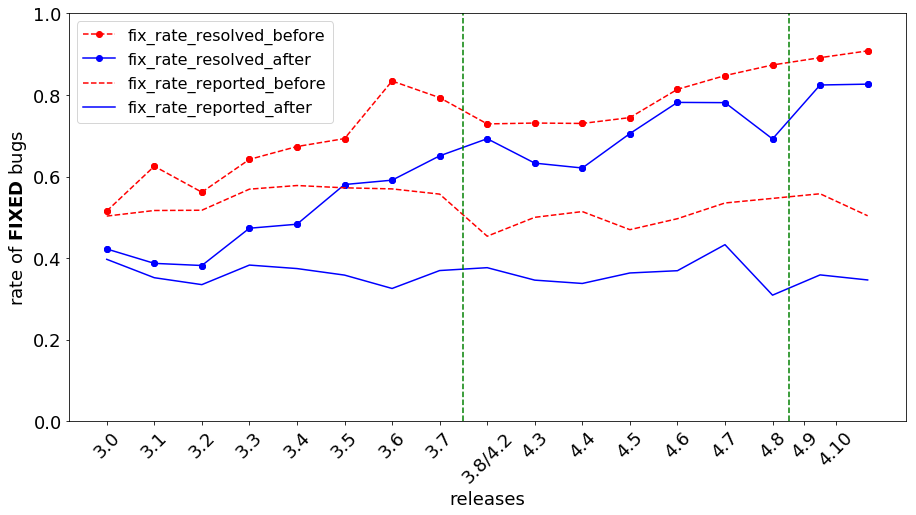

<Figure size 720x360 with 0 Axes>

In [29]:
fig, ax = plt.subplots()

x = get_x_axis_tick_placement()

data = statistics.copy()
data= sort_df(data,'release')
data = data[['release','period','fix_rate_ours','fix_rate_bram']] 

data_ours = data[['release','period','fix_rate_ours']]
data_ours = data_ours.rename(index=str,columns={'fix_rate_ours':'fix_rate'})
data_ours['method'] = 'ours'

data_bram = data[['release','period','fix_rate_bram']]
data_bram = data_bram.rename(index=str,columns={'fix_rate_bram':'fix_rate'})
data_bram['method'] = 'bram'


data = pd.DataFrame()
data = data.append(data_ours,ignore_index=True)
data = data.append(data_bram,ignore_index=True)

data['label'] = ''
for index,row in data.iterrows():
    rel = row['release']
    date = relase_creation_ts_all[rel]
    date = date[:date.find(' ')]
    date = date[:date.rfind('-')]
    #stats2.loc[index,'label'] = rel+' ('+date+')'
    #stats2.loc[index,'label'] = date+' - '+rel
    if rel=='4.2':
        rel='3.8/4.2'
    data.loc[index,'label'] = rel
    
plt.figure(figsize=(10,5))

fig.set_figheight(7.5)
fig.set_figwidth(15)

#ax = data.plot(x='release', y='fix_rate')
#df.plot(x='release', y='category', secondary_y=True, ax=ax)

ax.plot( 'release', 'fix_rate', data=data[(data['period']=='before') & (data['method']=='ours')], marker='o',color='red', label='fix_rate_resolved_before',linestyle='--')
ax.plot( 'release', 'fix_rate', data=data[(data['period']=='after') & (data['method']=='ours')], marker='o', color='blue',label='fix_rate_resolved_after')

ax.plot( 'release', 'fix_rate', data=data[(data['period']=='before') & (data['method']=='bram')], color='red', label='fix_rate_reported_before',linestyle='--')
ax.plot( 'release', 'fix_rate', data=data[(data['period']=='after') & (data['method']=='bram')], color='blue', label='fix_rate_reported_after')

ax.set_xlabel('releases', fontsize=18)
ax.set_ylabel('rate of ' + r"$\it{" + r"\bf{"+ 'FIXED' +  "}"+ "}$" + ' bugs', fontsize=18)

ax.axvline(x=14.35, c='g',linestyle='--')
ax.axvline(x=7.5, c='g',linestyle='--')

ax.set_xticks(x)
ax.set_xticklabels(data.label.unique().tolist())

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    tick.label.set_rotation(45)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.legend(fontsize=16)
ax.set_ylim(0,1)
plt.show()
ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'rq1_fix_before_after.pdf', bbox_inches="tight")

In [43]:
from scipy import stats

def compare_distributions(tt,var1,var2):         
    normal_test_var1 = stats.kstest(tt[var1].values.tolist(), 'norm')
    normal_test_var2 = stats.kstest(tt[var2].values.tolist(), 'norm')
    
    print(tt[[var1, var2]])
    tt[[var1, var2]].plot(kind='box')
    
    #not normal distribution
    if normal_test_var1.pvalue<0.05 or  normal_test_var2.pvalue<0.05:
        print('At least one sample not normally distributed')
        #wilkoxon
        wresult = stats.ranksums(tt[var1], tt[var2])
        
        if wresult.pvalue<0.05:
            print('Statistically significant difference found')
        else:
            print('Statistically significant difference NOT found')
        print(wresult)
    else:
        print('Both samples are normally distributed')
        #t-test
        tresult = stats.ttest_rel(tt[var1], tt[var2])

        if tresult.pvalue<0.05:
            print('Statistically significant difference found')
        else:
            print('Statistically significant difference NOT found')
        print(tresult)

In [32]:
data

,release,period,fix_rate,method,label
0,3.0,after,0.422378,ours,3.0
1,3.0,before,0.515368,ours,3.0
2,3.0,after,0.422378,ours,3.0
3,3.0,before,0.515368,ours,3.0
4,3.1,after,0.387072,ours,3.1
5,3.1,before,0.625273,ours,3.1
6,3.1,after,0.387072,ours,3.1
7,3.1,before,0.625273,ours,3.1
8,3.2,after,0.381814,ours,3.2
9,3.2,before,0.561632,ours,3.2


At least one sample not normally distributed
Statistically significant difference found
RanksumsResult(statistic=2.4627125370289455, pvalue=0.013789042047603766)


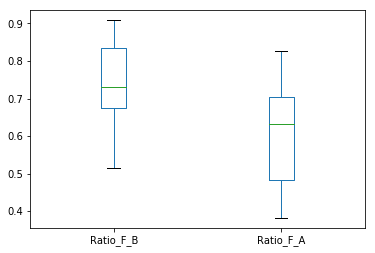

In [35]:
tdata = data.copy()
tdata = tdata[tdata['method']=='ours']

tt = pd.DataFrame()
for release in tdata.release.unique():
    tt = tt.append({'release' : str(release),
                   'Ratio_F_B' : tdata.loc[(tdata['release']==release) & (tdata['period']=='before'),'fix_rate'].values.tolist()[0],
                   'Ratio_F_A' : tdata.loc[(tdata['release']==release) & (tdata['period']=='after'),'fix_rate'].values.tolist()[0]},ignore_index=True)
    
compare_distributions(tt,'Ratio_F_B','Ratio_F_A')

At least one sample not normally distributed
Statistically significant difference found
RanksumsResult(statistic=4.9770903720375195, pvalue=6.454718995113268e-07)


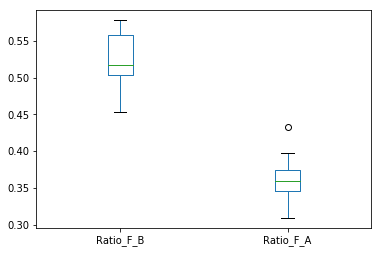

In [34]:
tdata = data.copy()
tdata = tdata[tdata['method']=='bram']

tt = pd.DataFrame()
for release in tdata.release.unique():
    tt = tt.append({'release' : str(release),
                   'Ratio_F_B' : tdata.loc[(tdata['release']==release) & (tdata['period']=='before'),'fix_rate'].values.tolist()[0],
                   'Ratio_F_A' : tdata.loc[(tdata['release']==release) & (tdata['period']=='after'),'fix_rate'].values.tolist()[0]},ignore_index=True)
    
compare_distributions(tt,'Ratio_F_B','Ratio_F_A')

In [39]:
tt

,Ratio_F_A,Ratio_F_B,release
0,0.422378,0.515368,3.0
1,0.387072,0.625273,3.1
2,0.381814,0.561632,3.2
3,0.473241,0.642080,3.3
4,0.483089,0.673622,3.4
5,0.580432,0.693089,3.5
6,0.591125,0.834360,3.6
7,0.650765,0.793473,3.7
8,0.692804,0.729128,4.2
9,0.632899,0.731240,4.3


In [41]:
tt.Ratio_F_A.median()

0.6328986960882648

In [42]:
tt.Ratio_F_B.median()

0.7312404287901991

In [ ]:
ax.plot( 'release', 'fix_rate', data=data[(data['period']=='before') & (data['method']=='bram')], color='red', label='fix_rate_reported_before',linestyle='--')
ax.plot( 'release', 'fix_rate', data=data[(data['period']=='after') & (data['method']=='bram')], color='blue', label='fix_rate_reported_after')

data = df_yearly_stats_first.copy()

compare_distributions(data,'Ratio_R_B','Ratio_R_A')

In [ ]:
## triaging time RQ3

In [ ]:
fix_times = fixed_bugs.copy()

In [ ]:
ours = fix_times[['release','fix_time_ours']].rename(index=str,columns={'fix_time_ours':'fix_time'})
ours['type'] = 'ours'

bram = fix_times[['release','fix_time_bram']].rename(index=str,columns={'fix_time_bram':'fix_time'})
bram['type'] = 'bram'

data = pd.DataFrame()
data = data.append(ours,ignore_index=True)
data = data.append(bram,ignore_index=True)
data

In [ ]:
rel_sorted = data[['release']].drop_duplicates()
rel_sorted= sort_df(rel_sorted,'release')
rel_sorted

In [ ]:
#fix_times = fixed_bugs[['release','fix_time_bram','fix_time_ours']]#,'period'

data2 = pd.DataFrame()
for index,row in rel_sorted.iterrows():
    rel = row['release']
    data2 = data2.append(data[data['release']==rel],ignore_index=True)
    
#x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,44/3,46/3]
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

plt.figure(figsize=(10,5))

fig.set_figheight(7.5)
fig.set_figwidth(15)

#ax = data.plot(marker='o')
ax = sns.violinplot(x="release", y="fix_time",hue="type", data=data2)
    
plt.axvline(x=13.5, c='r')
plt.ylabel('fix time')
plt.xlabel('release')
plt.xticks(x, data2.release.unique().tolist())
plt.show()